In [55]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import QasmSimulator
from numpy import pi

## Q1.A

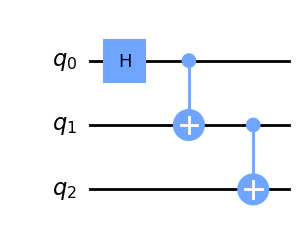

In [39]:
q_circuit_1a = QuantumCircuit(3)
# H gate at q0
q_circuit_1a.h(0)
# CNOT with q0 as control and q1 as target
q_circuit_1a.cx(0,1)
q_circuit_1a.cx(1,2)
q_circuit_1a.draw("mpl")

## Q1.B

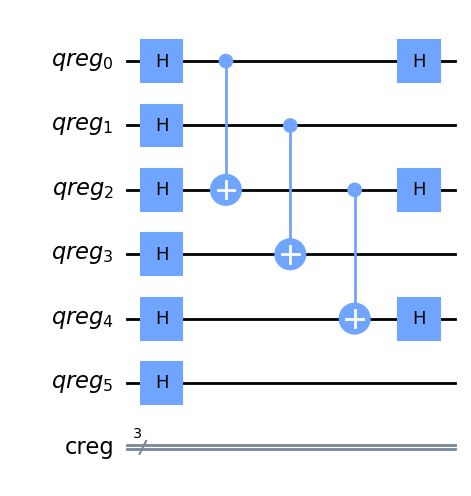

In [40]:
q_register = QuantumRegister(6, 'qreg')
# instantiate classical register with 3 bits
c_register = ClassicalRegister(3, 'creg')
q_circuit_1b = QuantumCircuit(q_register, c_register)
# apply H gate to each qubit
for i in range(0,6):
    q_circuit_1b.h(q_register[i])
# CNOTs
q_circuit_1b.cx(0,2)
q_circuit_1b.cx(1,3)
q_circuit_1b.cx(2,4)
# barrier for visual separation bw CNOT and H
q_circuit_1b.barrier()
q_circuit_1b.h(q_register[0])
q_circuit_1b.h(q_register[2])
q_circuit_1b.h(q_register[4])
q_circuit_1b.draw(output="mpl", plot_barriers=False)

## Q1.C

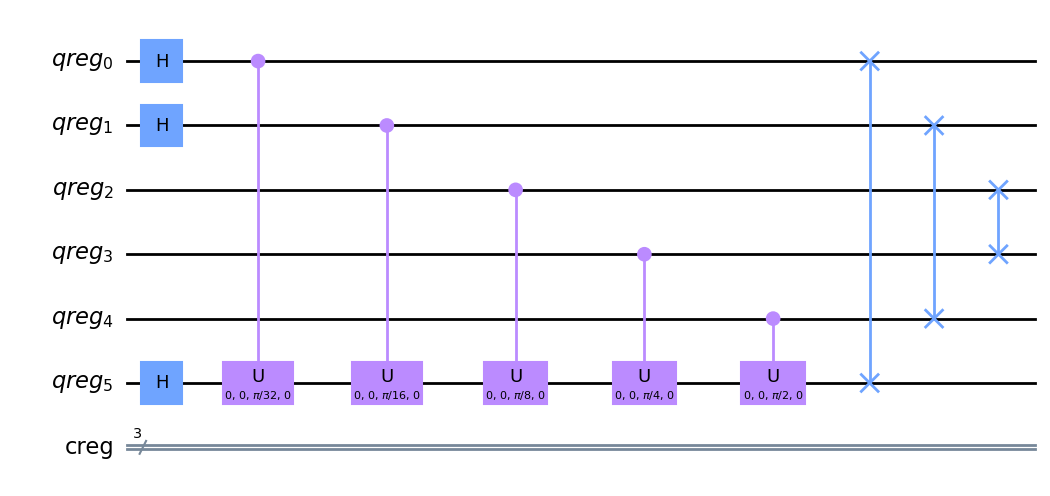

In [48]:
q_register = QuantumRegister(6, 'qreg')
# instantiate classical register with 3 bits
c_register = ClassicalRegister(3, 'creg')
q_circuit_1c = QuantumCircuit(q_register, c_register)
# H gates
q_circuit_1c.h(q_register[0])
q_circuit_1c.h(q_register[1])
q_circuit_1c.h(q_register[5])
# U gates
for i in range(5,0,-1):
    # control starts at 0 to 4
    ix = 5 - i
    # target of q5
    q_circuit_1c.cu(0, 0, pi / (2**i), 0, q_register[ix], q_register[5])
# SWAPs
q_circuit_1c.swap(q_register[0], q_register[5])
q_circuit_1c.barrier()
q_circuit_1c.swap(q_register[1], q_register[4])
q_circuit_1c.barrier()
q_circuit_1c.swap(q_register[2], q_register[3])
q_circuit_1c.draw(output="mpl", plot_barriers=False)

## Q2.A

In [64]:
## Example Code ----

# simulator = QasmSimulator()
# qr = QuantumRegister(1, 'q')
# qc = QuantumCircuit(qr)
# qc.h(0)

# qc.measure_all()
# cc = transpile(qc, simulator)

# # Execute the circuit on the qasm simulator
# job = simulator.run(cc, shots=1000)

# # Grab results from the job
# result = job.result()

# # Returns counts
# counts = result.get_counts(cc)

In [65]:
simulator = QasmSimulator()
q_circuit_1a.measure_all()
cc = transpile(q_circuit_1a, simulator)
# Execute the circuit on the qasm simulator
job = simulator.run(cc, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(cc)
print(counts)

{'000 000': 535, '111 111': 465}


## Q2.B

## Q2.C

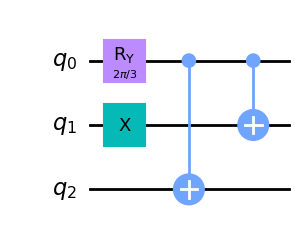

In [67]:
q_register_3b = QuantumRegister(3, 'q')
qc_3b = QuantumCircuit(q_register_3b)
# amplitudes derived as cos(theta/2) = 1/2, sin(theta/2) = sqrt(3)/2
# apply Ry gate with 2pi/3 phase shift
qc_3b.ry((2 * pi) / 3, q_register_3b[0])
qc_3b.cx(q_register_3b[0], q_register_3b[2])
qc_3b.x(q_register_3b[1])
qc_3b.cx(q_register_3b[0], q_register_3b[1])
qc_3b.draw(output="mpl", plot_barriers=False)